# PathIntegrate Quickstart guide

In [1]:
!pip install .

Processing d:\pathintegrate
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for PathIntegrate: filename=PathIntegrate-0.0.1-py3-none-any.whl size=1685443 sha256=e542fab059f9642bd5b988f44c9c975b4ad78340e13b68469ec36b8356e093f1
  Stored in directory: C:\Users\cw2019\AppData\Local\Temp\pip-ephem-wheel-cache-9w11nntk\wheels\19\06\21\168b38d63ac116bfe0858f6efae800868c63fe9fec9cc2fffc
Successfully built PathIntegrate
  Attempting uninstall: PathIntegrate
    Found existing installation: PathIntegrate 0.0.1
    Uninstalling PathIntegrate-0.0.1:
      Successfully uninstalled PathIntegrate-0.0.1



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import pathintegrate
import sspa

c:\Users\cw2019\.conda\envs\py10\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\cw2019\.conda\envs\py10\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\cw2019\.conda\envs\py10\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Load multi-omics datasets and metadata

In [3]:
metab = pathintegrate.load_example_data('metabolomics')
prot = pathintegrate.load_example_data('proteomics')

The proteomics data contains the metadata column

In [4]:
prot.head()

,O00182,O00220,O00253,O14763,O14836,O43915,O94907,P00797,P01127,P01241,...,Q9UKL0,Q9ULX7,Q9UNK0,Q9Y478,Q9Y4K4,Q9Y5A7,Q9Y5L3,Q9Y5V3,Q9Y653,Group
sample_id,,,,,,,,,,,,,,,,,,,,,
INCOV092-BL,10.499046,4.108639,6.260154,6.722554,10.504367,8.545390,10.724486,8.664588,11.701879,8.966646,...,3.074093,2.639784,5.146036,2.937521,8.433509,3.274849,2.070798,1.003806,3.503626,Mild
INCOV107-BL,9.974258,3.518560,4.698671,5.985321,9.580609,8.099680,11.021719,8.052122,12.064962,5.527914,...,3.072335,2.361624,6.274084,3.868208,8.934732,4.995750,1.731189,1.089978,4.399312,Mild
INCOV020-BL,11.030835,5.251186,6.845172,9.054961,11.023916,7.416310,9.568452,10.709513,8.344538,10.215193,...,3.455134,1.290294,2.154327,2.000634,4.544658,0.850766,2.234723,0.524290,4.840999,Severe
INCOV035-BL,10.784361,4.869835,5.551323,7.855721,10.356665,7.401949,9.968144,8.954985,10.741812,10.864942,...,2.951877,2.613248,3.618144,2.834577,6.816611,1.666262,1.785225,0.164508,2.451285,Severe
INCOV122-BL,10.117736,3.378996,4.411282,5.230120,9.533394,7.851850,11.461373,6.477619,12.242743,4.508236,...,2.594084,2.140240,5.903346,4.021954,8.946893,4.720346,1.060657,0.972700,1.404552,Mild


In [5]:
metab.head()

,1372,16610,1-methylnicotinamide,72665,30915,37373,16831,545959,17050,16359,...,3-carboxy-4-methyl-5-pentyl-2-furanpropionate (3-CMPFP)**,3-hydroxystachydrine*,28238,76341,89312,2-naphthol sulfate,"2,3-dihydroxy-5-methylthio-4-pentenoate (DMTPA)*","3-bromo-5-chloro-2,6-dihydroxybenzoic acid*",17861,89188
sample_id,,,,,,,,,,,,,,,,,,,,,
INCOV092-BL,1.541009,1.228611,1.270288,1.224076,1.962028,0.652984,2.903274,1.408834,1.456369,1.308804,...,2.154529,131.020117,2.887337,1.530451,1.104007,3.784643,2.211049,1.018270,0.971305,1.513364
INCOV107-BL,0.910486,2.169111,2.717505,2.819585,1.234384,1.453066,2.404390,0.971039,2.707132,0.372411,...,0.768345,1.229592,0.760664,1.401061,1.407221,1.740068,1.232189,1.763617,0.950304,1.008152
INCOV020-BL,0.831297,1.574348,2.214271,2.126393,0.861793,2.877589,1.185766,1.121170,0.239253,1.203344,...,0.340036,5.109188,0.791518,1.607621,0.938780,0.314845,2.867404,0.819024,1.092295,0.612057
INCOV035-BL,1.862011,0.792962,0.618858,1.434183,1.223473,0.706152,1.211518,1.083164,1.138143,0.722719,...,0.193813,0.324673,0.512065,0.984174,0.574492,0.919711,0.916824,0.392931,1.097797,1.428652
INCOV122-BL,1.416927,2.493762,0.819272,1.770040,0.888144,0.693444,1.014827,0.772214,2.392052,1.487486,...,0.729336,0.704408,0.702571,1.123920,1.151637,0.168597,0.757779,1.101685,1.051279,1.053482


Load or download lastest Reactome multi-omics pathways

In [4]:
mo_paths = sspa.process_gmt(infile='D:\PathIntegrate\src\pathintegrate\data\Reactome_Homo_sapiens_pathways_multiomics_R85.gmt')

Initiate a PathIntegrate object

In [6]:
pi_model = pathintegrate.PathIntegrate(
    omics_data={'Metabolomics': metab, 'Proteomics':prot.iloc[:, :-1]}, 
    metadata=prot['Group'], 
    pathway_source=mo_paths, 
    sspa_scoring=sspa.sspa_SVD, 
    min_coverage=4)

### Fit a PathIntegrate Multi-View model

In [7]:
covid_multi_view = pi_model.MultiView(ncomp=5)

Generating pathway scores...
Fitting MultiView model


For Multi-View models, check the R2 value - the sum of the latent variables explained variance in Y across omics views of a good prediction should be close to 1

In [8]:
sum(covid_multi_view.explained_var_y_)

0.8425303048034543

Visualise omics block importance

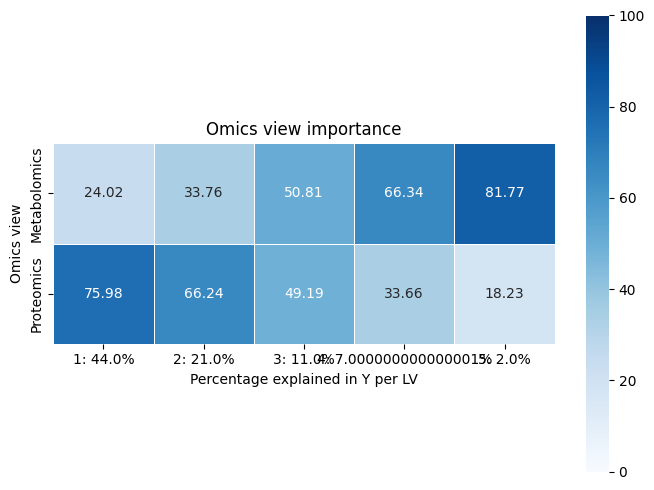

In [9]:
pathintegrate.plot.omics_view_importance(covid_multi_view)

### Fit a PathIntegrate Single-View model

In [10]:
covid_single_view = pi_model.SingleView(model_params={'random_state':0, 'max_iter':1000})

Generating pathway scores...
Fitting SingleView model


In [15]:
covid_single_view.molecular_importance

{'R-HSA-109581':         PC1_Loadings
 O00220      0.085424
 O14763      0.096195
 P50591     -0.099218
 Q14790     -0.277736
 O00273     -0.358679
 P52294     -0.056780
 Q04759     -0.350964
 Q12933     -0.358162
 Q13490     -0.356896
 Q9NR28     -0.349624
 P25786     -0.117399
 P55957     -0.348171
 Q9HAW4     -0.164504
 Q9Y5V3     -0.318526,
 'R-HSA-109582':         PC1_Loadings
 17754      -0.030821
 O00220      0.051146
 O14763      0.049465
 O43915     -0.036411
 P01127     -0.225018
 P07204     -0.093329
 P12931      0.093153
 P13726      0.013310
 P25116     -0.242823
 P31997     -0.035885
 P40225     -0.128387
 P78380     -0.026982
 Q02763     -0.086887
 Q12866      0.031823
 Q14242     -0.089025
 Q15389     -0.245575
 Q9UIB8     -0.251215
 P00749      0.032674
 P01137     -0.236669
 P03956     -0.164927
 P14210      0.049867
 P15692     -0.069111
 Q9BZW8     -0.235585
 P23229     -0.211588
 P78310      0.058344
 Q04759     -0.247494
 Q13574     -0.233627
 Q9NP99      0.100086

### Launch the PathIntegrate network viewer app

In [14]:
pathintegrate.launch_network_app(covid_single_view, mo_paths)

# Cross-validated PathIntegrate models

In [5]:
from sklearn.linear_model import LogisticRegression

In [5]:
pi_model = pathintegrate.PathIntegrate(
    omics_data={'Metabolomics': metab, 'Proteomics':prot.iloc[:, :-1]}, 
    metadata=prot['Group'], 
    pathway_source=mo_paths, 
    sspa_scoring=sspa.sspa_SVD, 
    min_coverage=4)

## Obtaining cross-validated performance metrics

In [8]:
from sklearn.linear_model import LogisticRegression
cv_single_view = pi_model.SingleViewCV(
    LogisticRegression, 
    model_params={'random_state':0, 'max_iter':500}, 
    cv_params={'cv':5, 'scoring':'roc_auc', 'verbose':2})


[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   3.6s
[CV] END .................................................... total time=   3.8s
[CV] END .................................................... total time=   3.6s
[CV] END .................................................... total time=   3.6s


In [23]:
print('Mean cross-validated ROC AUC: ', np.mean(cv_single_view))

Mean cross-validated ROC AUC:  0.9902777777777778


## Performing Grid Search cross-validation to select hyperparameters

Select the optimal number of latent variables in a multi-view model

In [15]:
param_grid = {
    "sv__C": np.logspace(-4, 4, 4),
}

sv_grid_search = pi_model.SingleViewGridSearchCV(
    model=LogisticRegression, 
    param_grid=param_grid, 
    grid_search_params={'cv':3, 'scoring':'roc_auc', 'verbose':2}
    )

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .......................................sv__C=0.0001; total time=   3.4s
[CV] END .......................................sv__C=0.0001; total time=   3.5s
[CV] END .......................................sv__C=0.0001; total time=   3.5s
[CV] END .........................sv__C=0.046415888336127774; total time=   3.4s
[CV] END .........................sv__C=0.046415888336127774; total time=   3.6s
[CV] END .........................sv__C=0.046415888336127774; total time=   3.5s
[CV] END ............................sv__C=21.54434690031882; total time=   3.4s
[CV] END ............................sv__C=21.54434690031882; total time=   3.6s
[CV] END ............................sv__C=21.54434690031882; total time=   3.7s
[CV] END ......................................sv__C=10000.0; total time=   3.6s
[CV] END ......................................sv__C=10000.0; total time=   3.6s
[CV] END ......................................sv

In [16]:
sv_grid_search.best_params_

{'sv__C': 21.54434690031882}

In [17]:
sv_grid_search.best_score_

0.9934156378600824

In [18]:
sv_grid_search.best_estimator_

Pipeline(steps=[('Scaler', StandardScaler()),
                ('sspa',
                 sspa_SVD(min_entity=4,
                          pathway_df=                                                    Pathway_name         2  \
Pathway_ID                                                                   
R-HSA-1059683                            Interleukin-6 signaling  P42224-1   
R-HSA-109581                                           Apoptosis    Q01094   
R-HSA-109582                                          Hemostasis    O14492   
R-HSA-109606                     Intrinsic Pathway for Apoptosis    P30419   
R-HSA-109703                                 PKB-mediated events    Q13370   
...                                                          ...       ...   
R-HSA-983695   Antigen activates B Cell Receptor (BCR) leadin...
R-HSA-983695       P01624    P01705  ...                                      
R-HSA-983705   A0A075B6P5    P01619  ...                                      
R-HSA-983712       Q16515    Q4KMQ2  ...                                      
R-HSA-991365       Q9HAV0    O60262  ...                                      
R-HSA-997272       O60262    Q92806  ...                                      

              4102 4103 4104  
Pathway_ID                    
R-HSA-1059683                 
R-HSA-109581                  
R-HSA-109582                  
R-HSA-109606                  
R-HSA-109703                  
...            ...  ...  ...  
R-HSA-983695                  
R-HSA-983705                  
R-HSA-983712                  
R-HSA-991365                  
R-HSA-997272                  

[2627 rows x 4104 columns])),
                ('sv', LogisticRegression(C=21.54434690031882))])

### Plot important features from the best estimator

In [7]:
pi_model.SingleViewCV(model=LogisticRegression, model_params={'random_state':0})

ValueError: Found input variables with inconsistent numbers of samples: [2, 127]